In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes = load_diabetes()

In [3]:
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = pd.Series(diabetes.target, name='target')

print(df_X.info())
print(df_X.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB
None
        age       sex       bmi        bp        s1        s2        s3   
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401  \
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.0363

In [4]:
X = diabetes.data
selected_columns = [2,3,7,8,9]
X = X[:, selected_columns] 

In [5]:
y = diabetes.target
X.shape, y.shape

((442, 5), (442,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=91)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 5) (353,)
(89, 5) (89,)


In [7]:
W = np.random.rand(5)
b = np.random.rand()
print(W, b)

[0.80081537 0.49576094 0.90252715 0.77449615 0.1123233 ] 0.9781368630252609


In [8]:
def model(X, W, b):
    y_pred = np.zeros(X.shape[0])  
    
    for i in range(5):
        y_pred += X[:, i] * W[i] 
        
    y_pred = y_pred + b  
    return y_pred.reshape(-1, 1)  

In [15]:
def MSE(a,b):
    mse = ((a - b) ** 2).mean()
    return mse

In [16]:
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    
    error = y_pred - y.reshape(-1,1)
    
    dW = 1/N * 2 * np.dot(X.T, error)
    dW = dW.flatten()
    db = 2 * error.mean()
    
    return dW, db

In [17]:
dW, db = gradient(X_train, W, b, y_train)
dW, db

(array([-5.08364964, -3.24716592, -3.21992431, -4.11185789, -3.13358231]),
 -299.63116436927925)

In [18]:
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = MSE(predictions, y)
    return L

In [19]:
Learning_rate = 0.01

In [20]:
losses = []
for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)

    W -= Learning_rate * dW
    b -= Learning_rate * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 21042.4300
Iteration 20 : Loss 16061.7029
Iteration 30 : Loss 12736.5826
Iteration 40 : Loss 10516.7543
Iteration 50 : Loss 9034.8250
Iteration 60 : Loss 8045.5212
Iteration 70 : Loss 7385.0974
Iteration 80 : Loss 6944.2364
Iteration 90 : Loss 6649.9576
Iteration 100 : Loss 6453.5392
Iteration 110 : Loss 6322.4544
Iteration 120 : Loss 6234.9881
Iteration 130 : Loss 6176.6437
Iteration 140 : Loss 6137.7431
Iteration 150 : Loss 6111.8253
Iteration 160 : Loss 6094.5769
Iteration 170 : Loss 6083.1186
Iteration 180 : Loss 6075.5279
Iteration 190 : Loss 6070.5216
Iteration 200 : Loss 6067.2429
Iteration 210 : Loss 6065.1201
Iteration 220 : Loss 6063.7711
Iteration 230 : Loss 6062.9413
Iteration 240 : Loss 6062.4605
Iteration 250 : Loss 6062.2151
Iteration 260 : Loss 6062.1292
Iteration 270 : Loss 6062.1523
Iteration 280 : Loss 6062.2506
Iteration 290 : Loss 6062.4014
Iteration 300 : Loss 6062.5898
Iteration 310 : Loss 6062.8057
Iteration 320 : Loss 6063.0424
Iteration 330

In [21]:
test_loss = loss(X_test, W, b, y_test)
print(f"Test Loss: {test_loss:.4f}")

Test Loss: 5459.4557


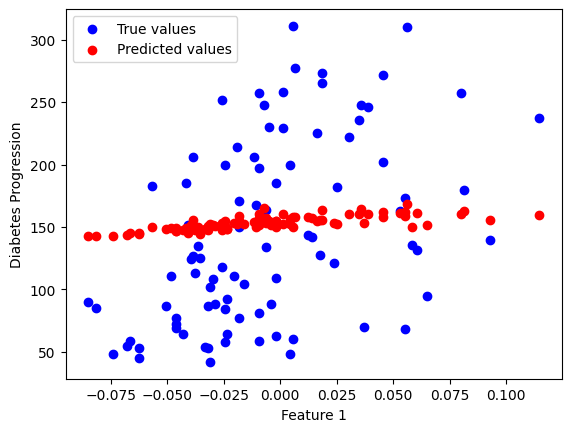

In [22]:
import matplotlib.pyplot as plt

y_pred = model(X_test, W, b)

plt.scatter(X_test[:, 0], y_test, color='blue', label='True values')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted values')
plt.xlabel('Feature 1')
plt.ylabel('Diabetes Progression')
plt.legend()
plt.show()

--------------------------------------

https://modulabs.co.kr/blog/diabetes-dataset-multi-linear-regression

loss 값이 큰 이유는 상대적으로 x 값들에 비해 y 값이 매우 크기 때문입니다 (-0.2 < x < 0.2, 25 < y < 346).
===>loss 값이 너무 크다고 느껴진다면, y 데이터를 346으로 나눈 뒤 정규화(Normalization)하여 훈련시켜보면 숫자가 작아질 것입니다.

In [23]:
# 정규화 진행
y_train_normalized = y_train / 346
y_test_normalized = y_test / 346

In [24]:
# 모델 학습
losses = []
for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train_normalized)

    W -= Learning_rate * dW
    b -= Learning_rate * db
    L = loss(X_train, W, b, y_train_normalized)
    losses.append(L)
    
    if i % 10 == 0:
        print(f'Iteration {i} : Loss {L:.4f}')

Iteration 10 : Loss 15750.5933
Iteration 20 : Loss 10527.8018
Iteration 30 : Loss 7040.9979
Iteration 40 : Loss 4713.1519
Iteration 50 : Loss 3159.0346
Iteration 60 : Loss 2121.4643
Iteration 70 : Loss 1428.7445
Iteration 80 : Loss 966.2494
Iteration 90 : Loss 657.4542
Iteration 100 : Loss 451.2702
Iteration 110 : Loss 313.5901
Iteration 120 : Loss 221.6440
Iteration 130 : Loss 160.2301
Iteration 140 : Loss 119.2000
Iteration 150 : Loss 91.7782
Iteration 160 : Loss 73.4416
Iteration 170 : Loss 61.1703
Iteration 180 : Loss 52.9483
Iteration 190 : Loss 47.4298
Iteration 200 : Loss 43.7163
Iteration 210 : Loss 41.2078
Iteration 220 : Loss 39.5038
Iteration 230 : Loss 38.3371
Iteration 240 : Loss 37.5291
Iteration 250 : Loss 36.9606
Iteration 260 : Loss 36.5521
Iteration 270 : Loss 36.2506
Iteration 280 : Loss 36.0204
Iteration 290 : Loss 35.8381
Iteration 300 : Loss 35.6877
Iteration 310 : Loss 35.5586
Iteration 320 : Loss 35.4440
Iteration 330 : Loss 35.3390
Iteration 340 : Loss 35.2405


In [25]:
test_loss = loss(X_test, W, b, y_train_normalized)
print(f"Test Loss: {test_loss:.4f}")

Test Loss: 24.9323


----------------------

   #### EDA

In [54]:
df = pd.concat([df_X, df_y], axis=1)
corr_matrix = df.corr()

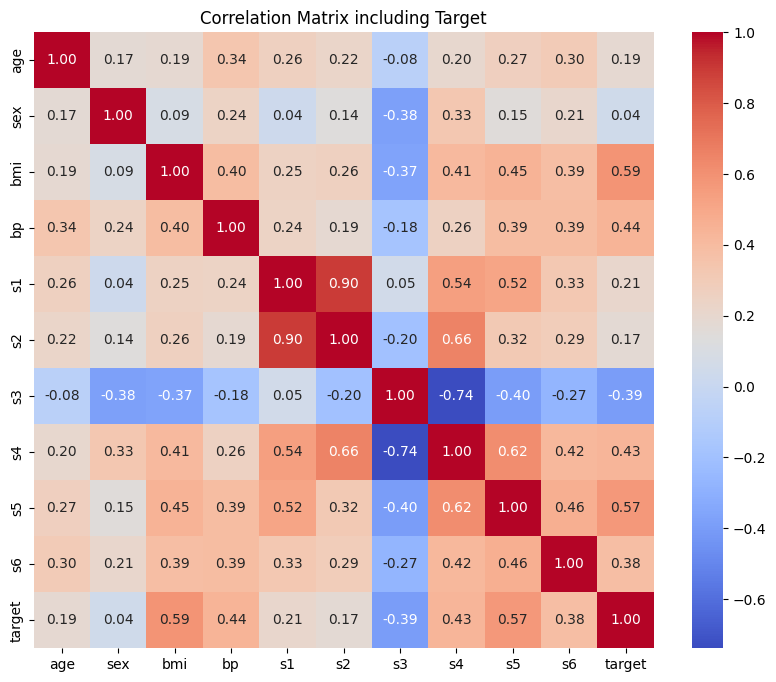

In [55]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix including Target')
plt.show()

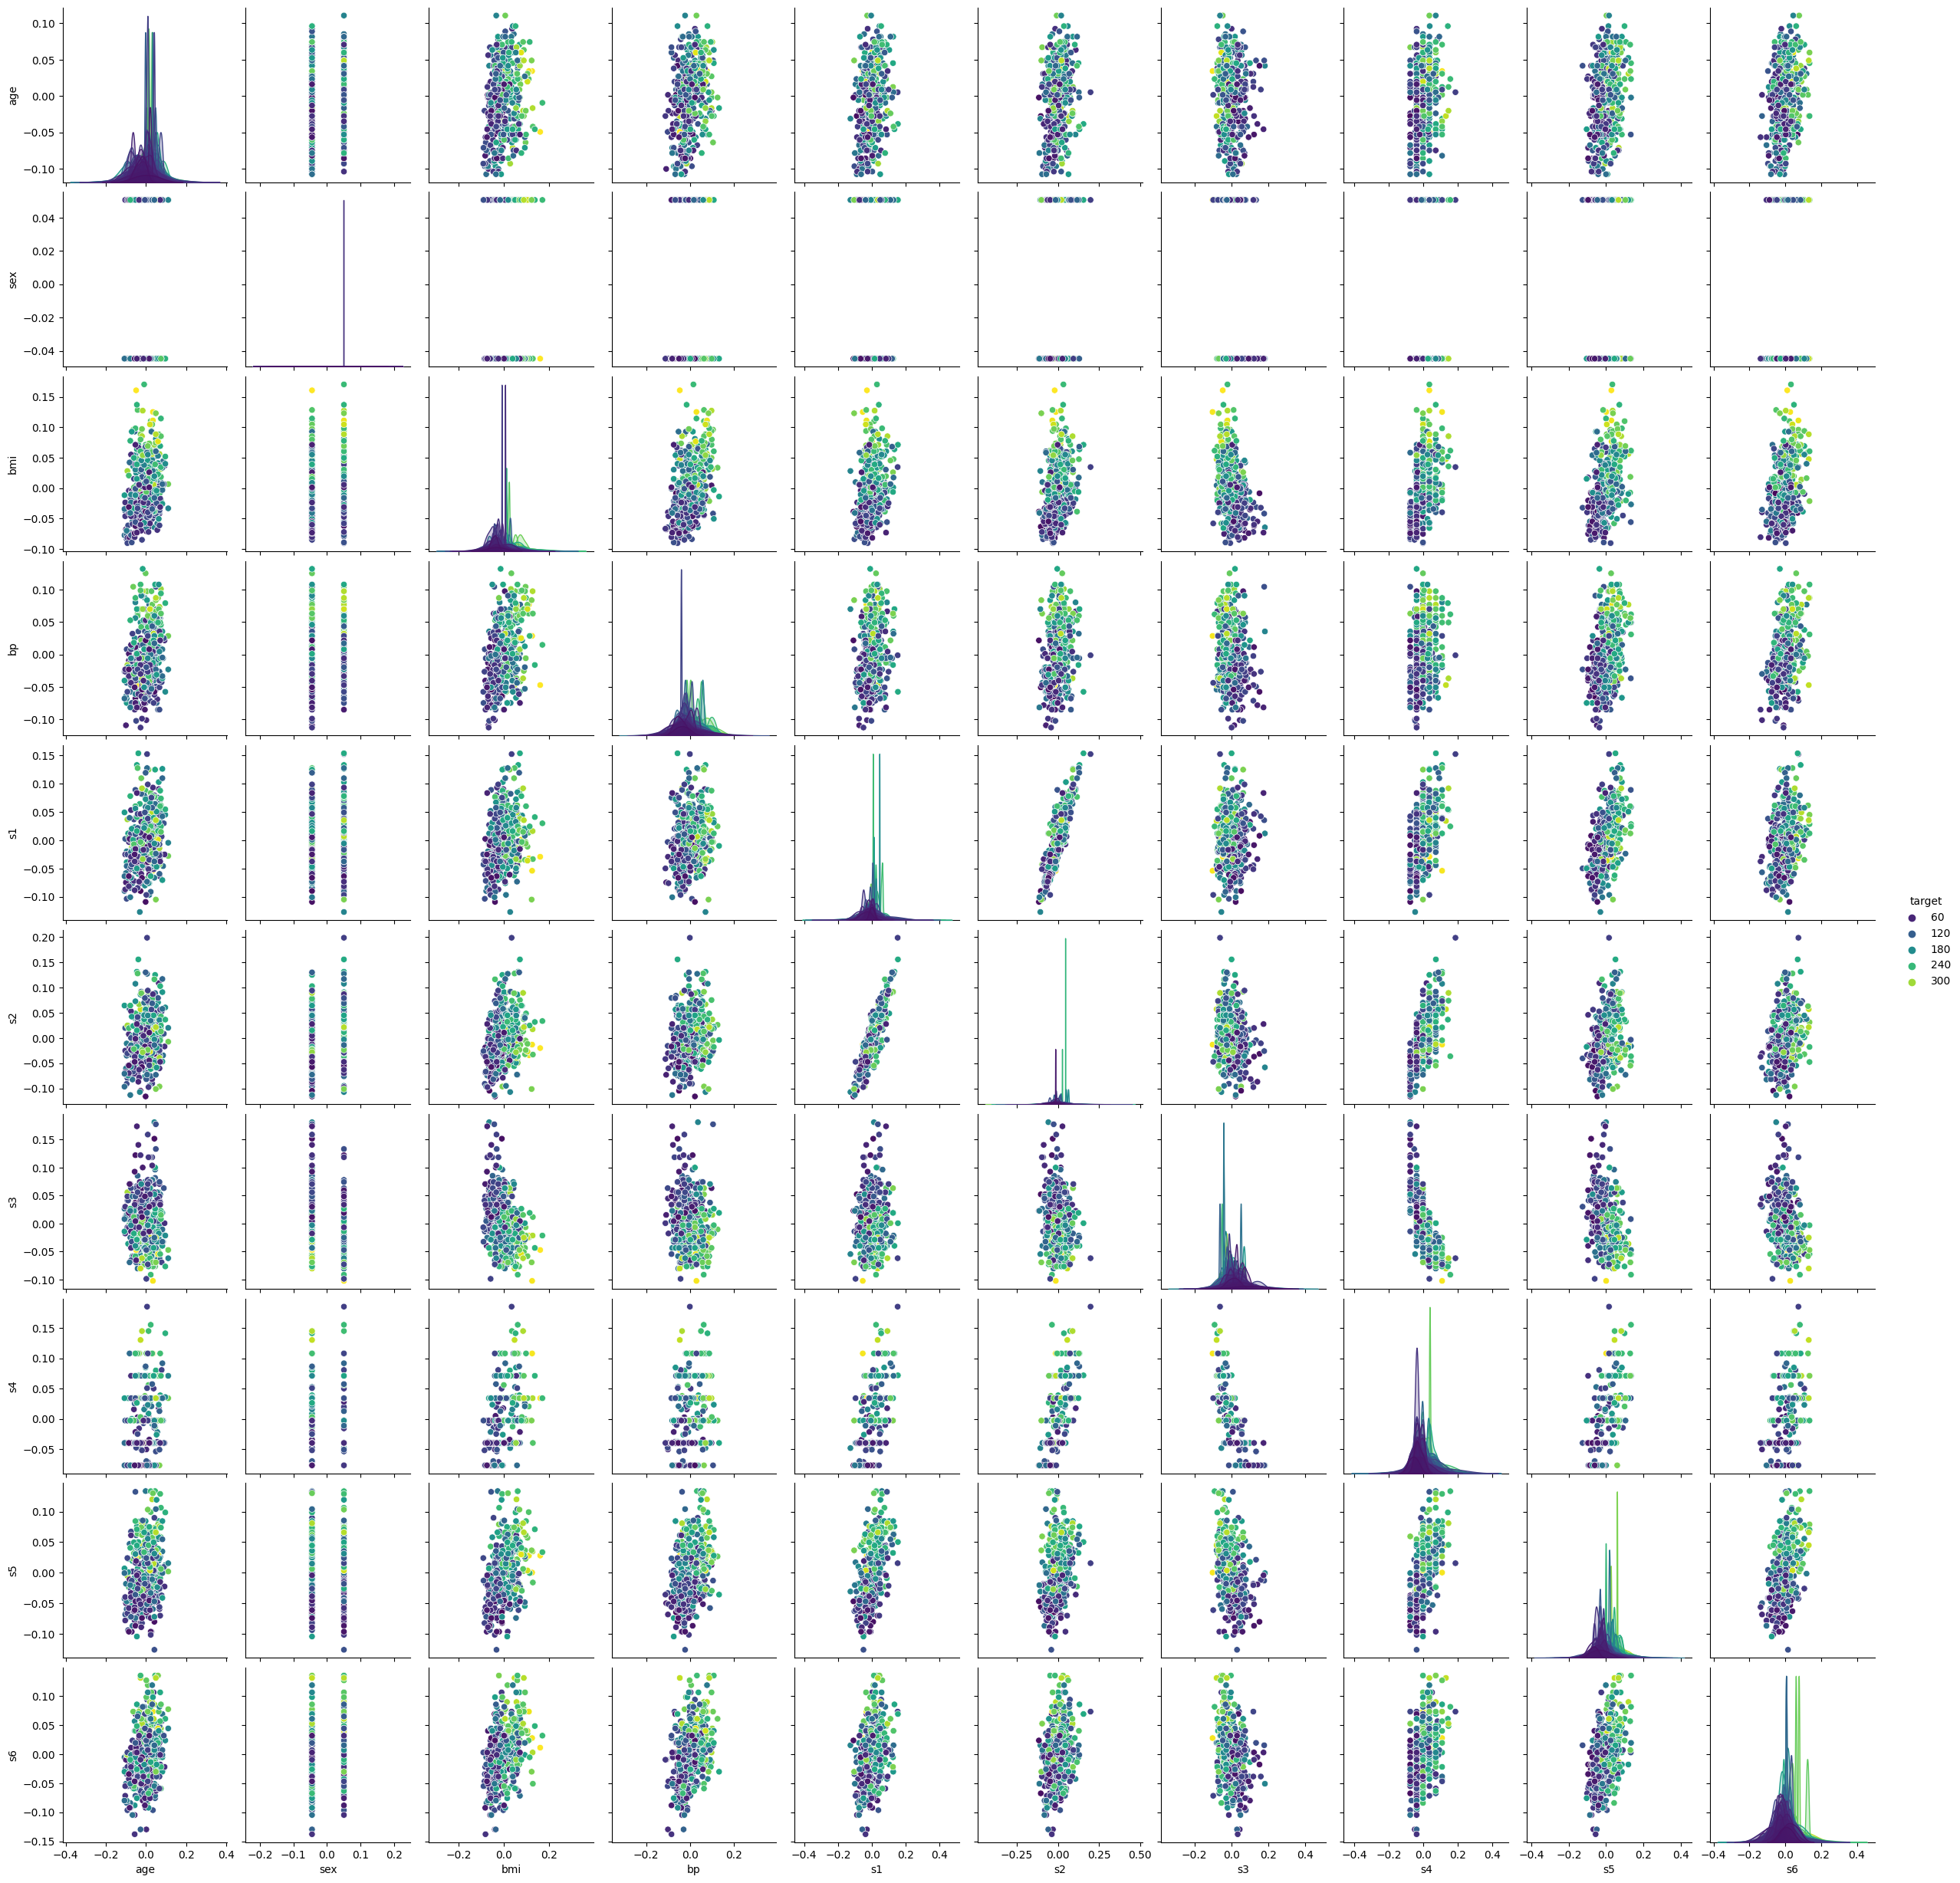

In [33]:
df = pd.concat([df_X, df_y], axis=1)
sns.pairplot(df, hue='target', palette='viridis', diag_kind='kde')
plt.show()

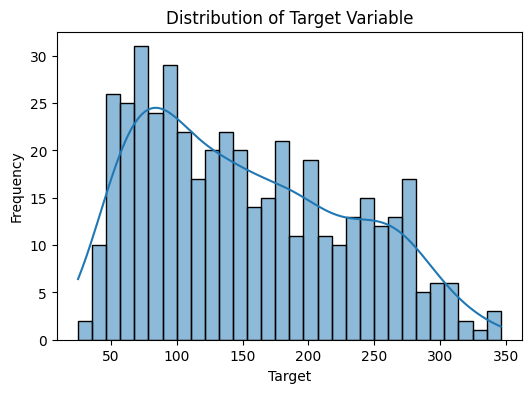

In [42]:
# EDA: 타겟 변수 분포
plt.figure(figsize=(6, 4))
sns.histplot(df_y, kde=True, bins=30)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()